In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/retail_price_prediction_mega_hiring_hackathon/Participants_Data_TGIH.zip

--2020-11-22 20:42:37--  https://machinehack-be.s3.amazonaws.com/retail_price_prediction_mega_hiring_hackathon/Participants_Data_TGIH.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.62.72
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.62.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6595880 (6.3M) [application/zip]
Saving to: ‘Participants_Data_TGIH.zip’

Participants_Data_T 100%[===================>]   6.29M  3.31MB/s    in 1.9s    

2020-11-22 20:42:40 (3.31 MB/s) - ‘Participants_Data_TGIH.zip’ saved [6595880/6595880]



In [ ]:
!unzip Participants_Data_TGIH.zip

Archive:  Participants_Data_TGIH.zip
   creating: Participants_Data_TGIH/
  inflating: Participants_Data_TGIH/Sample Submission.csv  
  inflating: __MACOSX/Participants_Data_TGIH/._Sample Submission.csv  
  inflating: Participants_Data_TGIH/Test.csv  
  inflating: __MACOSX/Participants_Data_TGIH/._Test.csv  
  inflating: Participants_Data_TGIH/Train.csv  
  inflating: __MACOSX/Participants_Data_TGIH/._Train.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('Participants_Data_TGIH/Train.csv')
test = pd.read_csv('Participants_Data_TGIH/Test.csv')

In [ ]:
train.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
test.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64, InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 CustomerID     0
 Country        0
 dtype: int64, (284780, 8), (122049, 7), InvoiceNo        int64
 StockCode        int64
 Description      int64
 Quantity         int64
 InvoiceDate     object
 UnitPrice      float64
 CustomerID     float64
 Country          int64
 dtype: object)

In [ ]:
#train = train[train.Quantity <4500]
#train = train[train.Quantity >-2000]
#train = train[train.UnitPrice <4500]


In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
k=['InvoiceDate']
for i in k:
  df[i] = pd.to_datetime(df[i])
for i in k:
  #df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] = df[i].dt.dayofweek
  #df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
del df['InvoiceDate']

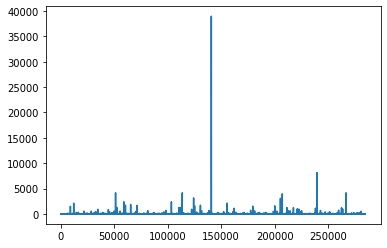

In [ ]:
df['UnitPrice'].plot()

In [ ]:
df = df.drop(df[df['UnitPrice']==38970].index)
df = df.drop(df[df['UnitPrice']==8142.75].index)

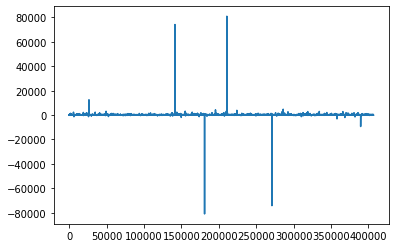

In [ ]:
df['Quantity'].plot()

In [ ]:
df = df.drop(df[df['Quantity']==80995].index)
df = df.drop(df[df['Quantity']==74215].index)
df = df.drop(df[df['Quantity']==-80995].index)
df = df.drop(df[df['Quantity']==-74215].index)
df = df.drop(df[df['Quantity']==12540].index)

In [ ]:
x=[]
for i in df['Quantity']:
  if i<0:
    x.append(0)
  else:
    x.append(1)
df['quant_sign']=x

In [ ]:

df.nunique()

InvoiceNo                 22183
StockCode                  3683
Description                3895
Quantity                    431
UnitPrice                   522
CustomerID                 4370
Country                      37
InvoiceDate_day              31
InvoiceDate_weekofyear       51
InvoiceDate_month            12
InvoiceDate_dayofweek         6
quant_sign                    2
dtype: int64

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate_day,InvoiceDate_weekofyear,InvoiceDate_month,InvoiceDate_dayofweek,quant_sign
0,6141,1583,144,3,3.75,14056.0,35,6,18,5,4,1
1,6349,1300,3682,6,1.95,13098.0,35,11,19,5,2,1
2,16783,2178,1939,4,5.95,15044.0,35,20,46,11,6,1
3,16971,2115,2983,1,0.83,15525.0,35,22,47,11,1,1
4,6080,1210,2886,12,1.65,13952.0,35,6,18,5,4,1


In [ ]:
##es
del df['Country']

InvoiceNo                    AxesSubplot(0.125,0.826831;0.168478x0.053169)
StockCode                 AxesSubplot(0.327174,0.826831;0.168478x0.053169)
Description               AxesSubplot(0.529348,0.826831;0.168478x0.053169)
Quantity                  AxesSubplot(0.731522,0.826831;0.168478x0.053169)
UnitPrice                    AxesSubplot(0.125,0.763028;0.168478x0.053169)
CustomerID                AxesSubplot(0.327174,0.763028;0.168478x0.053169)
InvoiceDate_day           AxesSubplot(0.529348,0.763028;0.168478x0.053169)
InvoiceDate_weekofyear    AxesSubplot(0.731522,0.763028;0.168478x0.053169)
InvoiceDate_month            AxesSubplot(0.125,0.699225;0.168478x0.053169)
InvoiceDate_dayofweek     AxesSubplot(0.327174,0.699225;0.168478x0.053169)
quant_sign                AxesSubplot(0.529348,0.699225;0.168478x0.053169)
dtype: object

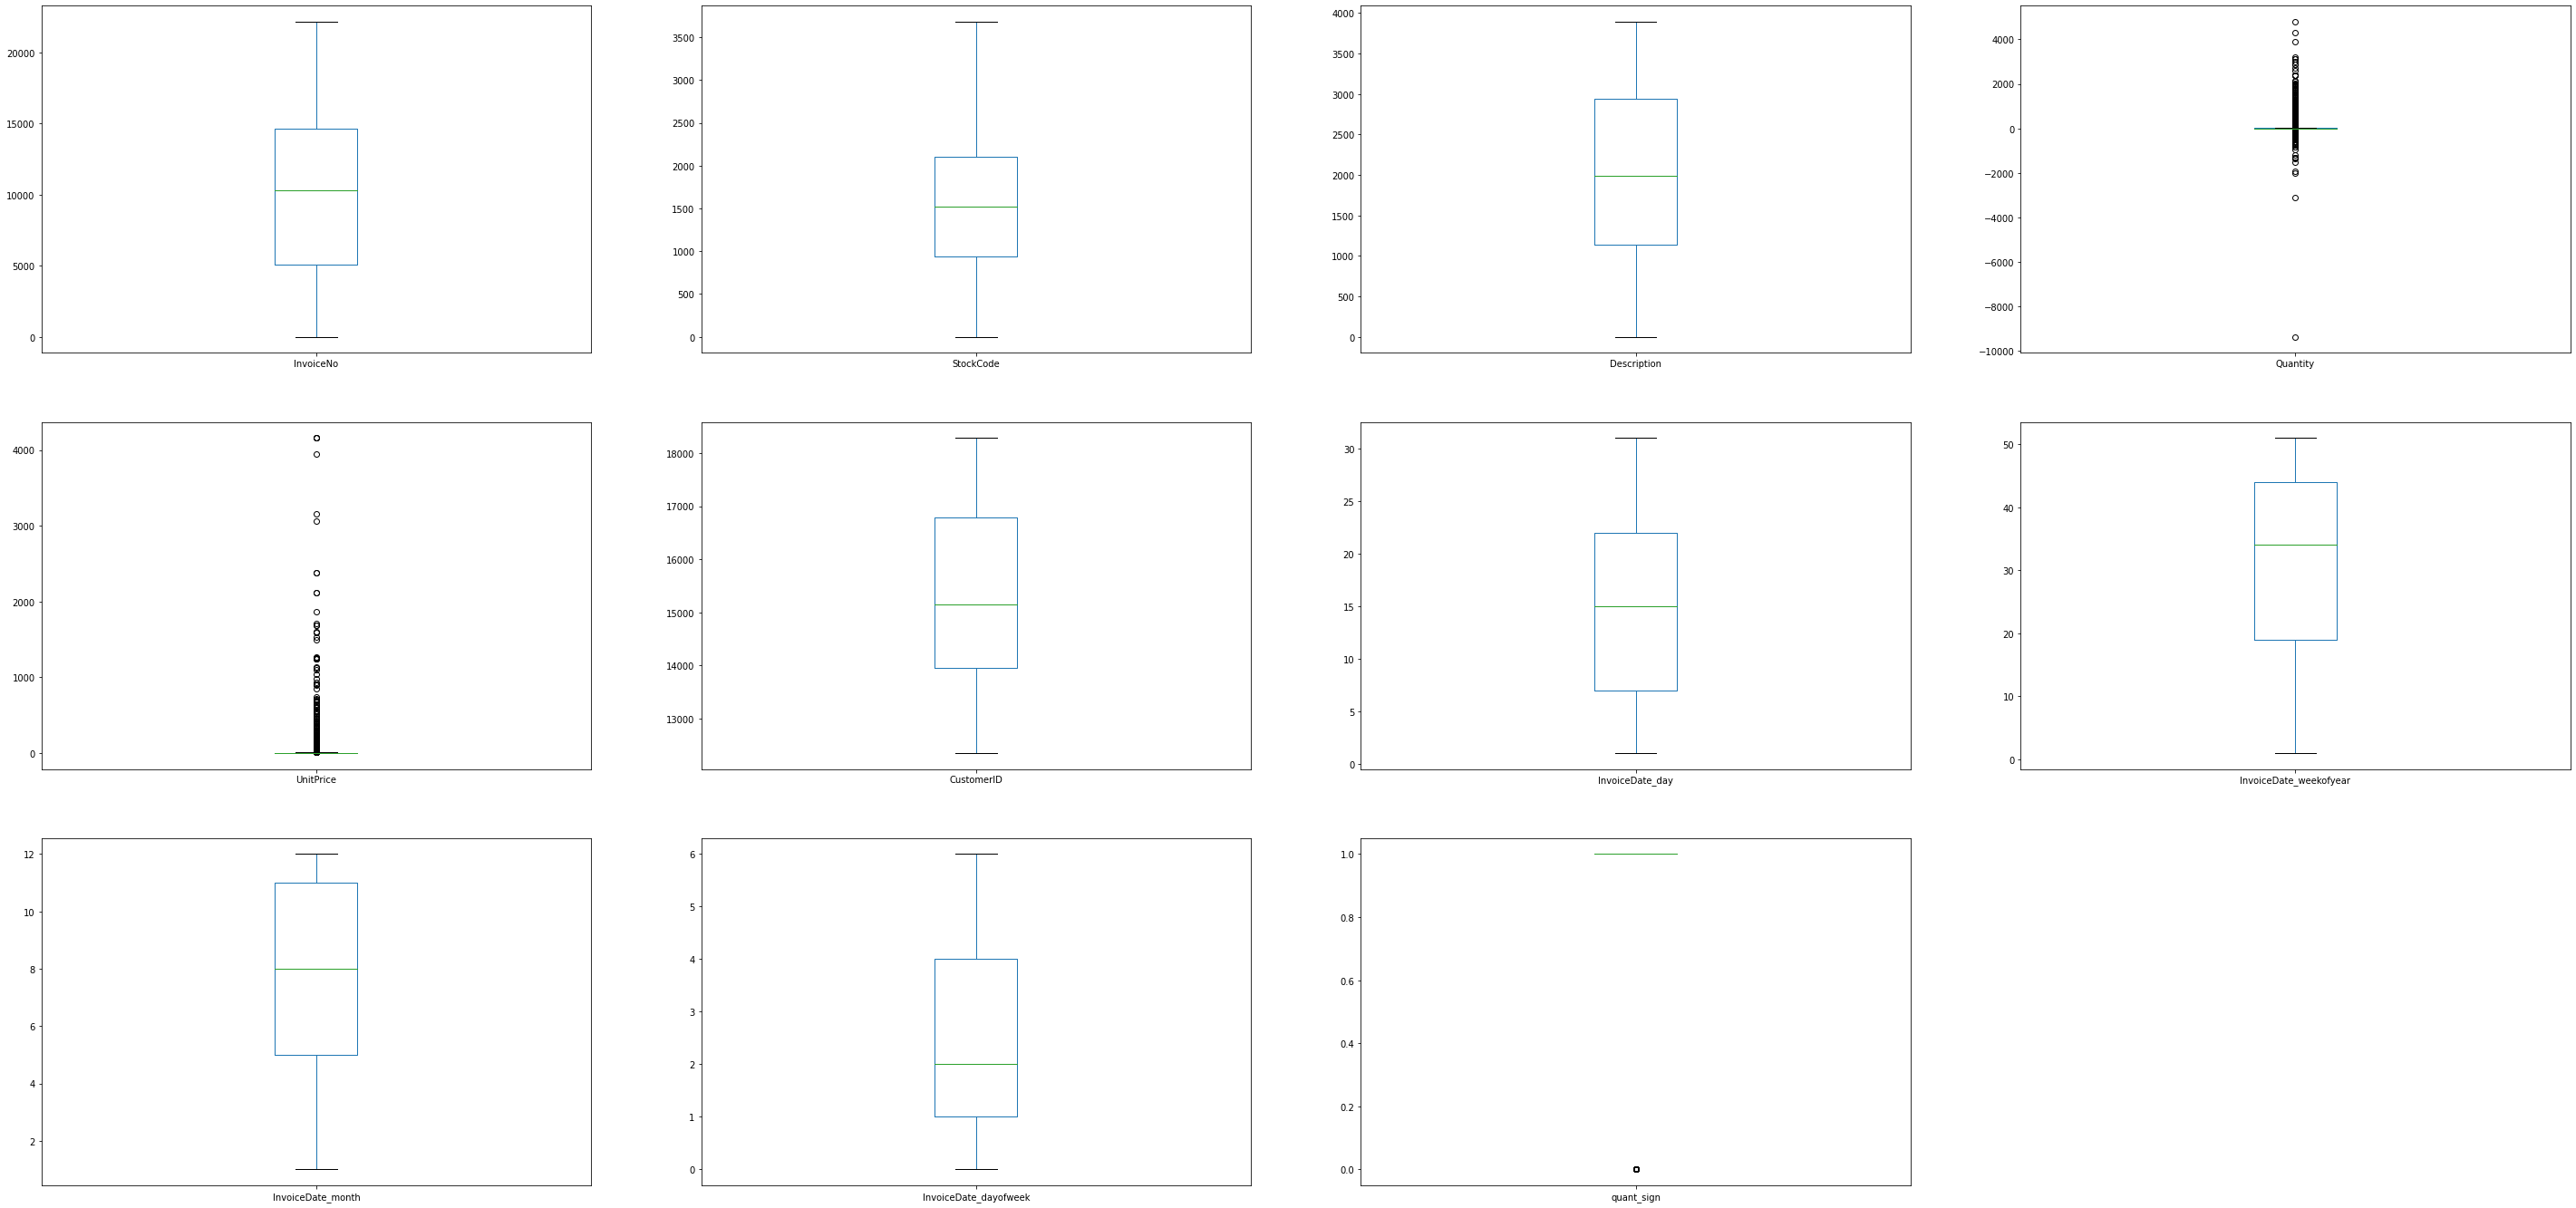

In [ ]:
## Check outliers
df.iloc[:,:].plot(kind='box',figsize=(50,100), subplots=True,grid=False, layout=(12, 4))
## Except metal fatigue, all are having outliers free, while selecting machine learning algorithm this should be taken into consideration

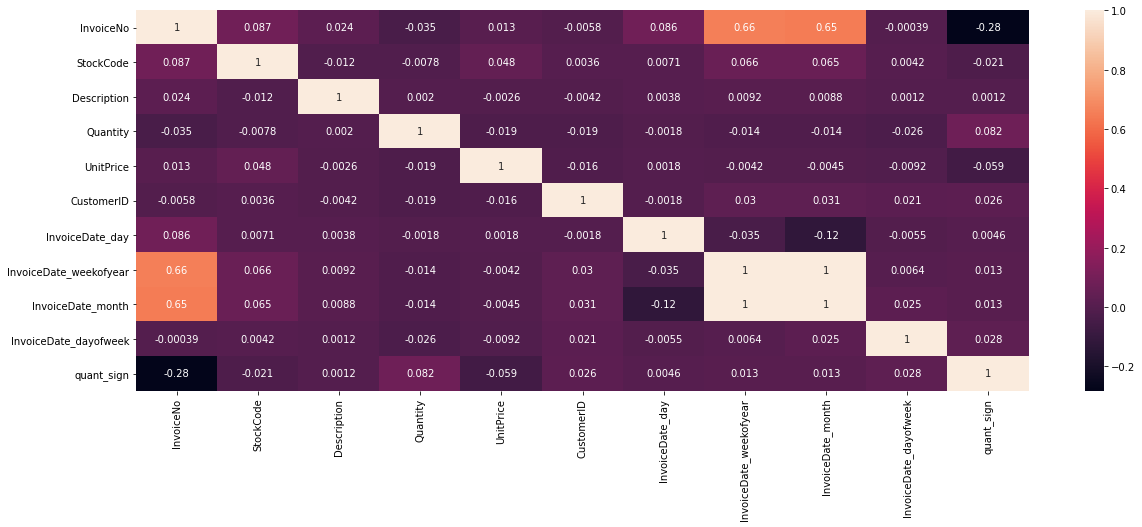

In [ ]:
##Correlation of the dataset
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [ ]:
temp = df.groupby(['CustomerID']).agg({#'Country':['count'],
                                       'Quantity':['count','mean','max','min'],
                                       'StockCode':['count','mean'],
                                       'Description':['count','mean','max','min'],
                                       'CustomerID':['count','mean']
                                      })
temp.columns = ['_'.join(x) for x in temp.columns]
df = pd.merge(df,temp,on=['CustomerID'],how='left')

(3895,
 0,
 2024.6939521461475,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc246030898>)

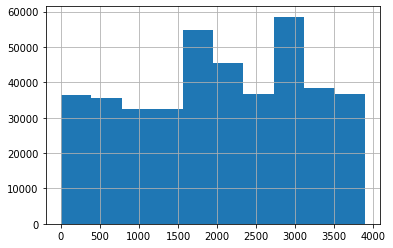

In [ ]:
df['Description'].max(),df['Description'].min(),df['Description'].mean(),df['Description'].hist()

In [ ]:
g=[]
for i in df['Description']:
  if 0<=i<=1000:
    g.append(1)
  elif 1000<i<=1500:
    g.append(2)
  elif 1500<i<=2025:
    g.append(3)
  elif 2025<i<=2750:
    g.append(4)
  elif 2750<i<=3895:
    g.append(5)
df['level']=g

In [ ]:
#math
df['lot_size']=df['StockCode']/df['Quantity']

In [ ]:
#df = pd.get_dummies(df, columns=['Country','Quantity'
#                                 ])

In [ ]:
train = df[df['UnitPrice'].isnull()==False]
test = df[df['UnitPrice'].isnull()==True]
del test['UnitPrice']

In [ ]:
train_df=train
test_df=test

In [ ]:
X = train_df.drop(labels=['UnitPrice'], axis=1)
y = train_df['UnitPrice'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((256295, 24), (256295,), (28478, 24), (28478,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 2,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_error(y_cv,y_pred_lgbm)))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 6.35683
[200]	valid_0's rmse: 6.7955
Early stopping, best iteration is:
[96]	valid_0's rmse: 6.29348
RMSLE: 6.293484837337835


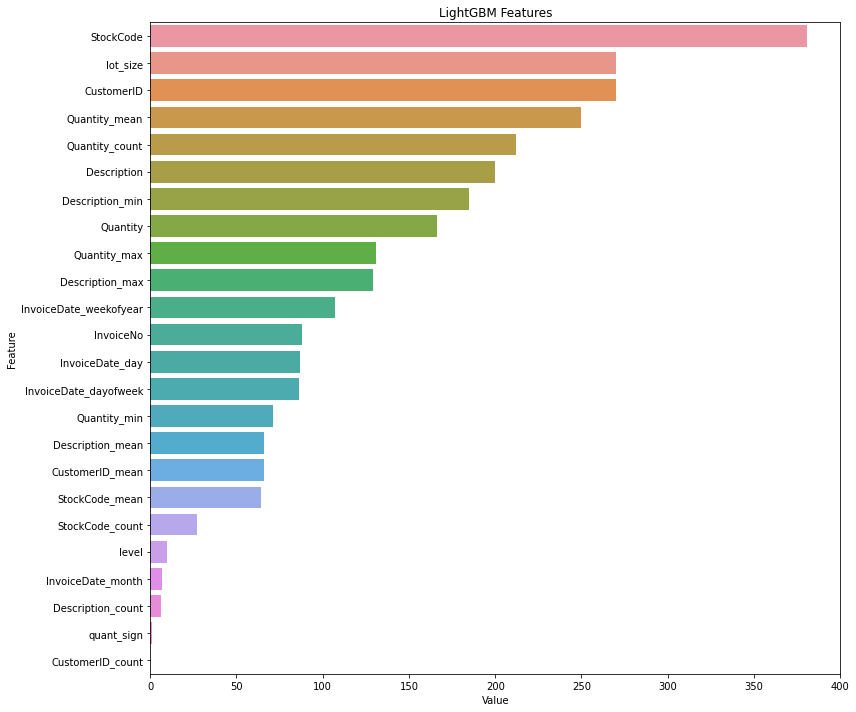

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting='gbdt',learning_rate=0.01, n_estimators=1000, random_state=101, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  6.4645235031496435


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  6.272571798305875


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  15.33647600694334


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  23.358902902659715


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  24.567732668629272


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  18.036524514220943


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  13.095709562641384


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  18.607020432557196


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  6.36753005895664


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  19.5559034145756


In [ ]:
np.mean(errlgb,0)

15.16628948626396

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([2.90625422, 2.94676705, 1.8802406 , ..., 2.31487022, 3.93878538,
       2.92984271])

In [ ]:
submission = pd.DataFrame({
        "UnitPrice":lgbm_final*1.45
    })
submission.to_csv('./dsp.csv', index=False)
print(submission)

        UnitPrice
0        4.214069
1        4.272812
2        2.726349
3        4.486819
4        5.432728
...           ...
122044   2.919527
122045   2.481384
122046   3.356562
122047   5.711239
122048   4.248272

[122049 rows x 1 columns]


In [ ]:
from google.colab import files
files.download('dsp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# gb

In [ ]:
X = train_df.drop(labels=['UnitPrice'], axis=1)
y = train_df['UnitPrice'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=500, random_state=42, subsample=0.8,min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv,y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         617.9197          10.4364            4.15m
         2         563.6867           7.7305            4.23m
         3         626.3991          12.6852            4.08m
         4         485.5445           4.9340            4.01m
         5         617.7371           3.6195            3.89m
         6         563.6675          15.9879            3.90m
         7         643.4553           4.4397            3.92m
         8         507.6899          10.7206            3.99m
         9         483.8252           7.8558            3.99m
        10         603.8313          10.0921            3.94m
        20         501.4376           4.1455            3.82m
        30         404.3651           2.5385            3.70m
        40         397.7945           1.5159            3.63m
        50         386.8666           2.8280            3.52m
        60         366.1735          -0.3599            3.44m
       

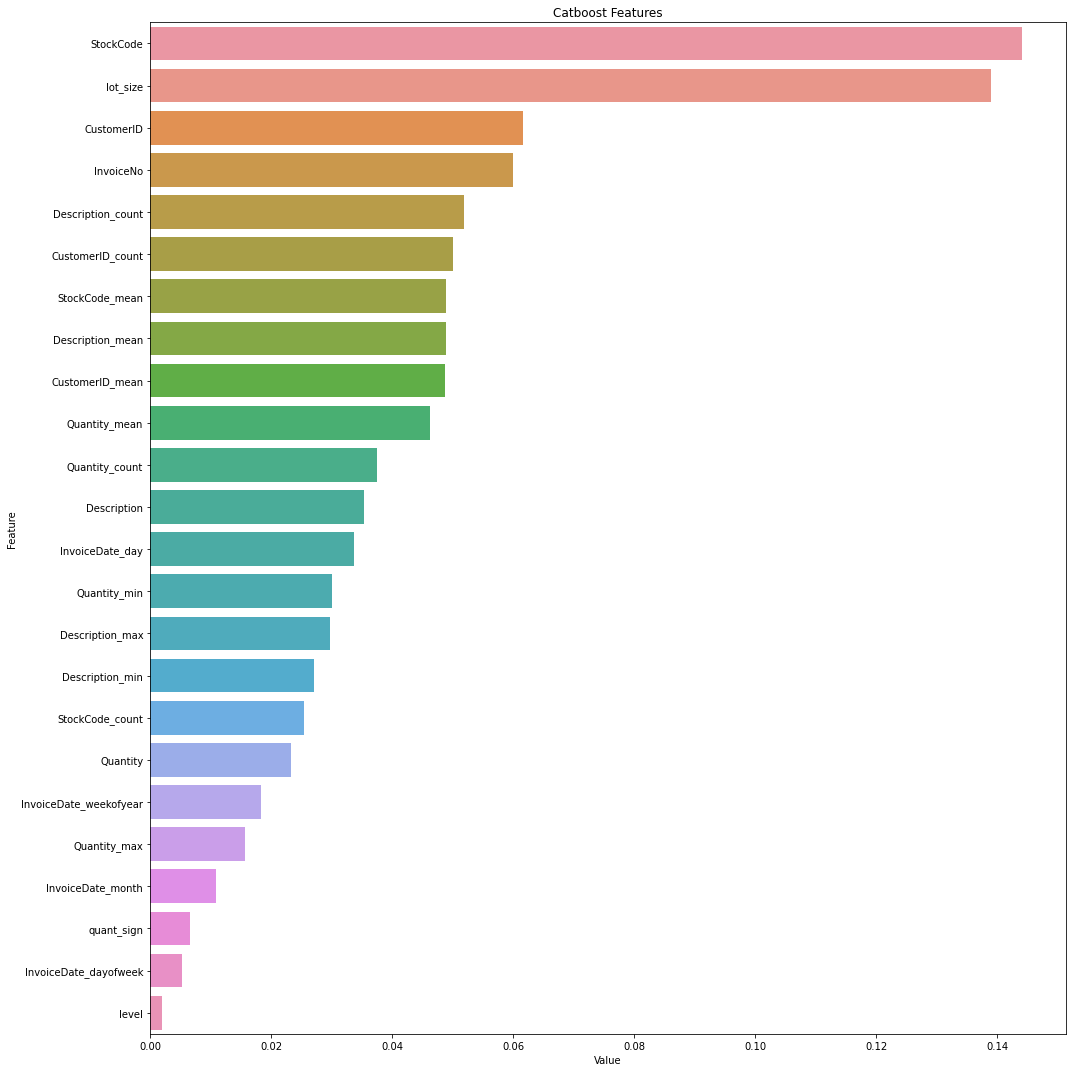

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.3, n_estimators=1000, random_state=101, subsample=0.8)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=650, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test,y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

In [ ]:
np.mean(errgb,0)

14.999565879402718

In [ ]:
gb_fib = np.mean(y_pred_totgb,0)
gb_fib

array([2.21656528, 1.71431931, 2.24980621, ..., 1.29115432, 6.43020166,
       2.63338955])

In [ ]:
submission = pd.DataFrame({
        "UnitPrice": gb_fib*1.44
    })
submission.to_csv('./best9.csv', index=False)
print(submission)

        UnitPrice
0        3.191854
1        2.468620
2        3.239721
3        3.559661
4       13.625601
...           ...
122044   1.356450
122045   1.857713
122046   1.859262
122047   9.259490
122048   3.792081

[122049 rows x 1 columns]


In [ ]:
from google.colab import files
files.download('best9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# div 2

In [ ]:
!pip install Catboost

In [ ]:
X = train_df.drop(labels=['UnitPrice'], axis=1)
y = train_df['UnitPrice'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
from catboost import CatBoostRegressor
gb = CatBoostRegressor(verbose=100, learning_rate=0.1, n_estimators=500, random_state=101, subsample=0.9)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv,y_pred)))

0:	learn: 24.2591266	total: 74.6ms	remaining: 37.2s
100:	learn: 11.8092054	total: 5.47s	remaining: 21.6s
200:	learn: 9.8461900	total: 10.7s	remaining: 15.9s
300:	learn: 8.8168956	total: 15.9s	remaining: 10.5s
400:	learn: 8.2209234	total: 21.1s	remaining: 5.21s
499:	learn: 7.7390590	total: 26.3s	remaining: 0us
RMSE 8.165622604249677


In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = CatBoostRegressor(verbose=100,learning_rate=0.3, n_estimators=1000, random_state=101, subsample=0.9)
    #gb = CatBoostRegressor(verbose=100, learning_rate=0.1, n_estimators=500, random_state=101, subsample=0.9)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test,y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

0:	learn: 22.5271771	total: 85.9ms	remaining: 1m 25s
100:	learn: 8.7600303	total: 5.88s	remaining: 52.4s
200:	learn: 7.1974559	total: 11.9s	remaining: 47.2s
300:	learn: 6.6744150	total: 17.9s	remaining: 41.6s
400:	learn: 6.4028390	total: 24.1s	remaining: 35.9s
500:	learn: 6.2554653	total: 30.2s	remaining: 30.1s
600:	learn: 6.1655268	total: 36.3s	remaining: 24.1s
700:	learn: 6.1053491	total: 42.5s	remaining: 18.1s
800:	learn: 6.0636251	total: 48.6s	remaining: 12.1s
900:	learn: 6.0252967	total: 54.6s	remaining: 6s
999:	learn: 5.9997106	total: 1m	remaining: 0us
MSE 8.71933409965619
0:	learn: 22.5834171	total: 68.2ms	remaining: 1m 8s
100:	learn: 8.8743943	total: 5.79s	remaining: 51.6s
200:	learn: 7.2189981	total: 11.6s	remaining: 46.2s
300:	learn: 6.7115690	total: 17.5s	remaining: 40.6s
400:	learn: 6.4571054	total: 23.5s	remaining: 35.1s
500:	learn: 6.2789367	total: 29.5s	remaining: 29.4s
600:	learn: 6.1821714	total: 35.6s	remaining: 23.6s
700:	learn: 6.1144046	total: 41.7s	remaining: 17.8